# Haar Wavelet Transformation
Implementing Haar Wavelet Transformation on the SWANSF dataset. It involves decomposing the time series into approximation and detail coefficients, which captures different frequency components.

In [43]:
#importing the libraries

import pywt
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [44]:
# on one sample data point of class M and class X

df_samp_M = pd.read_csv("sample data for wavelet/M1.0@265_Primary_ar115_s2010-08-06T06_36_00_e2010-08-06T18_24_00.csv", sep='\\t')
df_samp_C = pd.read_csv("sample data for wavelet/C9.6@1454_Primary_ar401_s2011-03-11T17_36_00_e2011-03-12T05_24_00.csv", sep='\\t')

df_samp_M.shape, df_samp_C.shape

((60, 55), (60, 55))

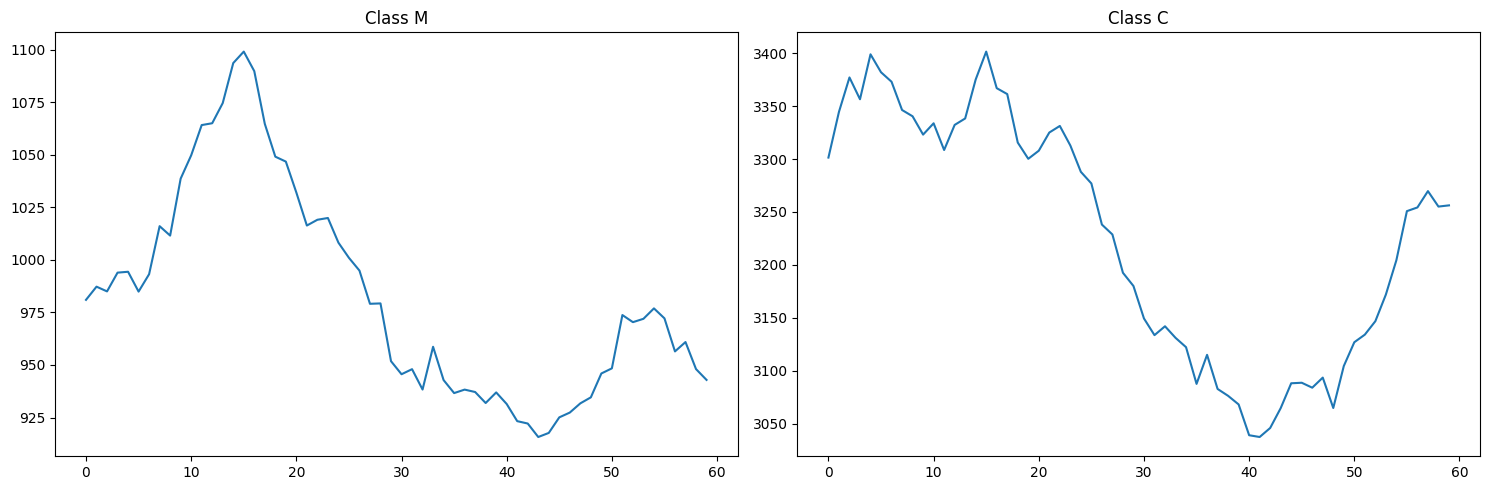

In [36]:
# A side-by-side comparison of the 'TOTUSJH' time series for Class M and Class C

series_M = df_samp_M[['Timestamp','TOTUSJH']]
series_M = series_M.dropna()

series_C = df_samp_C[['Timestamp','TOTUSJH']]
series_C = series_C.dropna()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
#axes[0].scatter(range(0,60),series_M.TOTUSJH)
axes[0].plot(series_M.TOTUSJH)
axes[0].set_title("Class M")
axes[1].plot(series_C.TOTUSJH)
axes[1].set_title("Class C")
fig.tight_layout()

# Haar transform

In [48]:
import matplotlib.pyplot as plt

# Extract information for plotting Class M
n_times_M = len(series_M)
time_M = range(n_times_M)
signal_M = series_M['TOTUSJH']

# Extract information for plotting Class C
n_times_C = len(series_C)
time_C = range(n_times_C)
signal_C = series_C['TOTUSJH']

In [49]:
def wavelet_denoising(x, wavelet, level):
    # Perform wavelet decomposition
    coeff = pywt.wavedec(x, wavelet, level=level)
    return coeff
    

### Visualizing the wavelet denoising process for the Class M signal at different levels using the Haar wavelet.

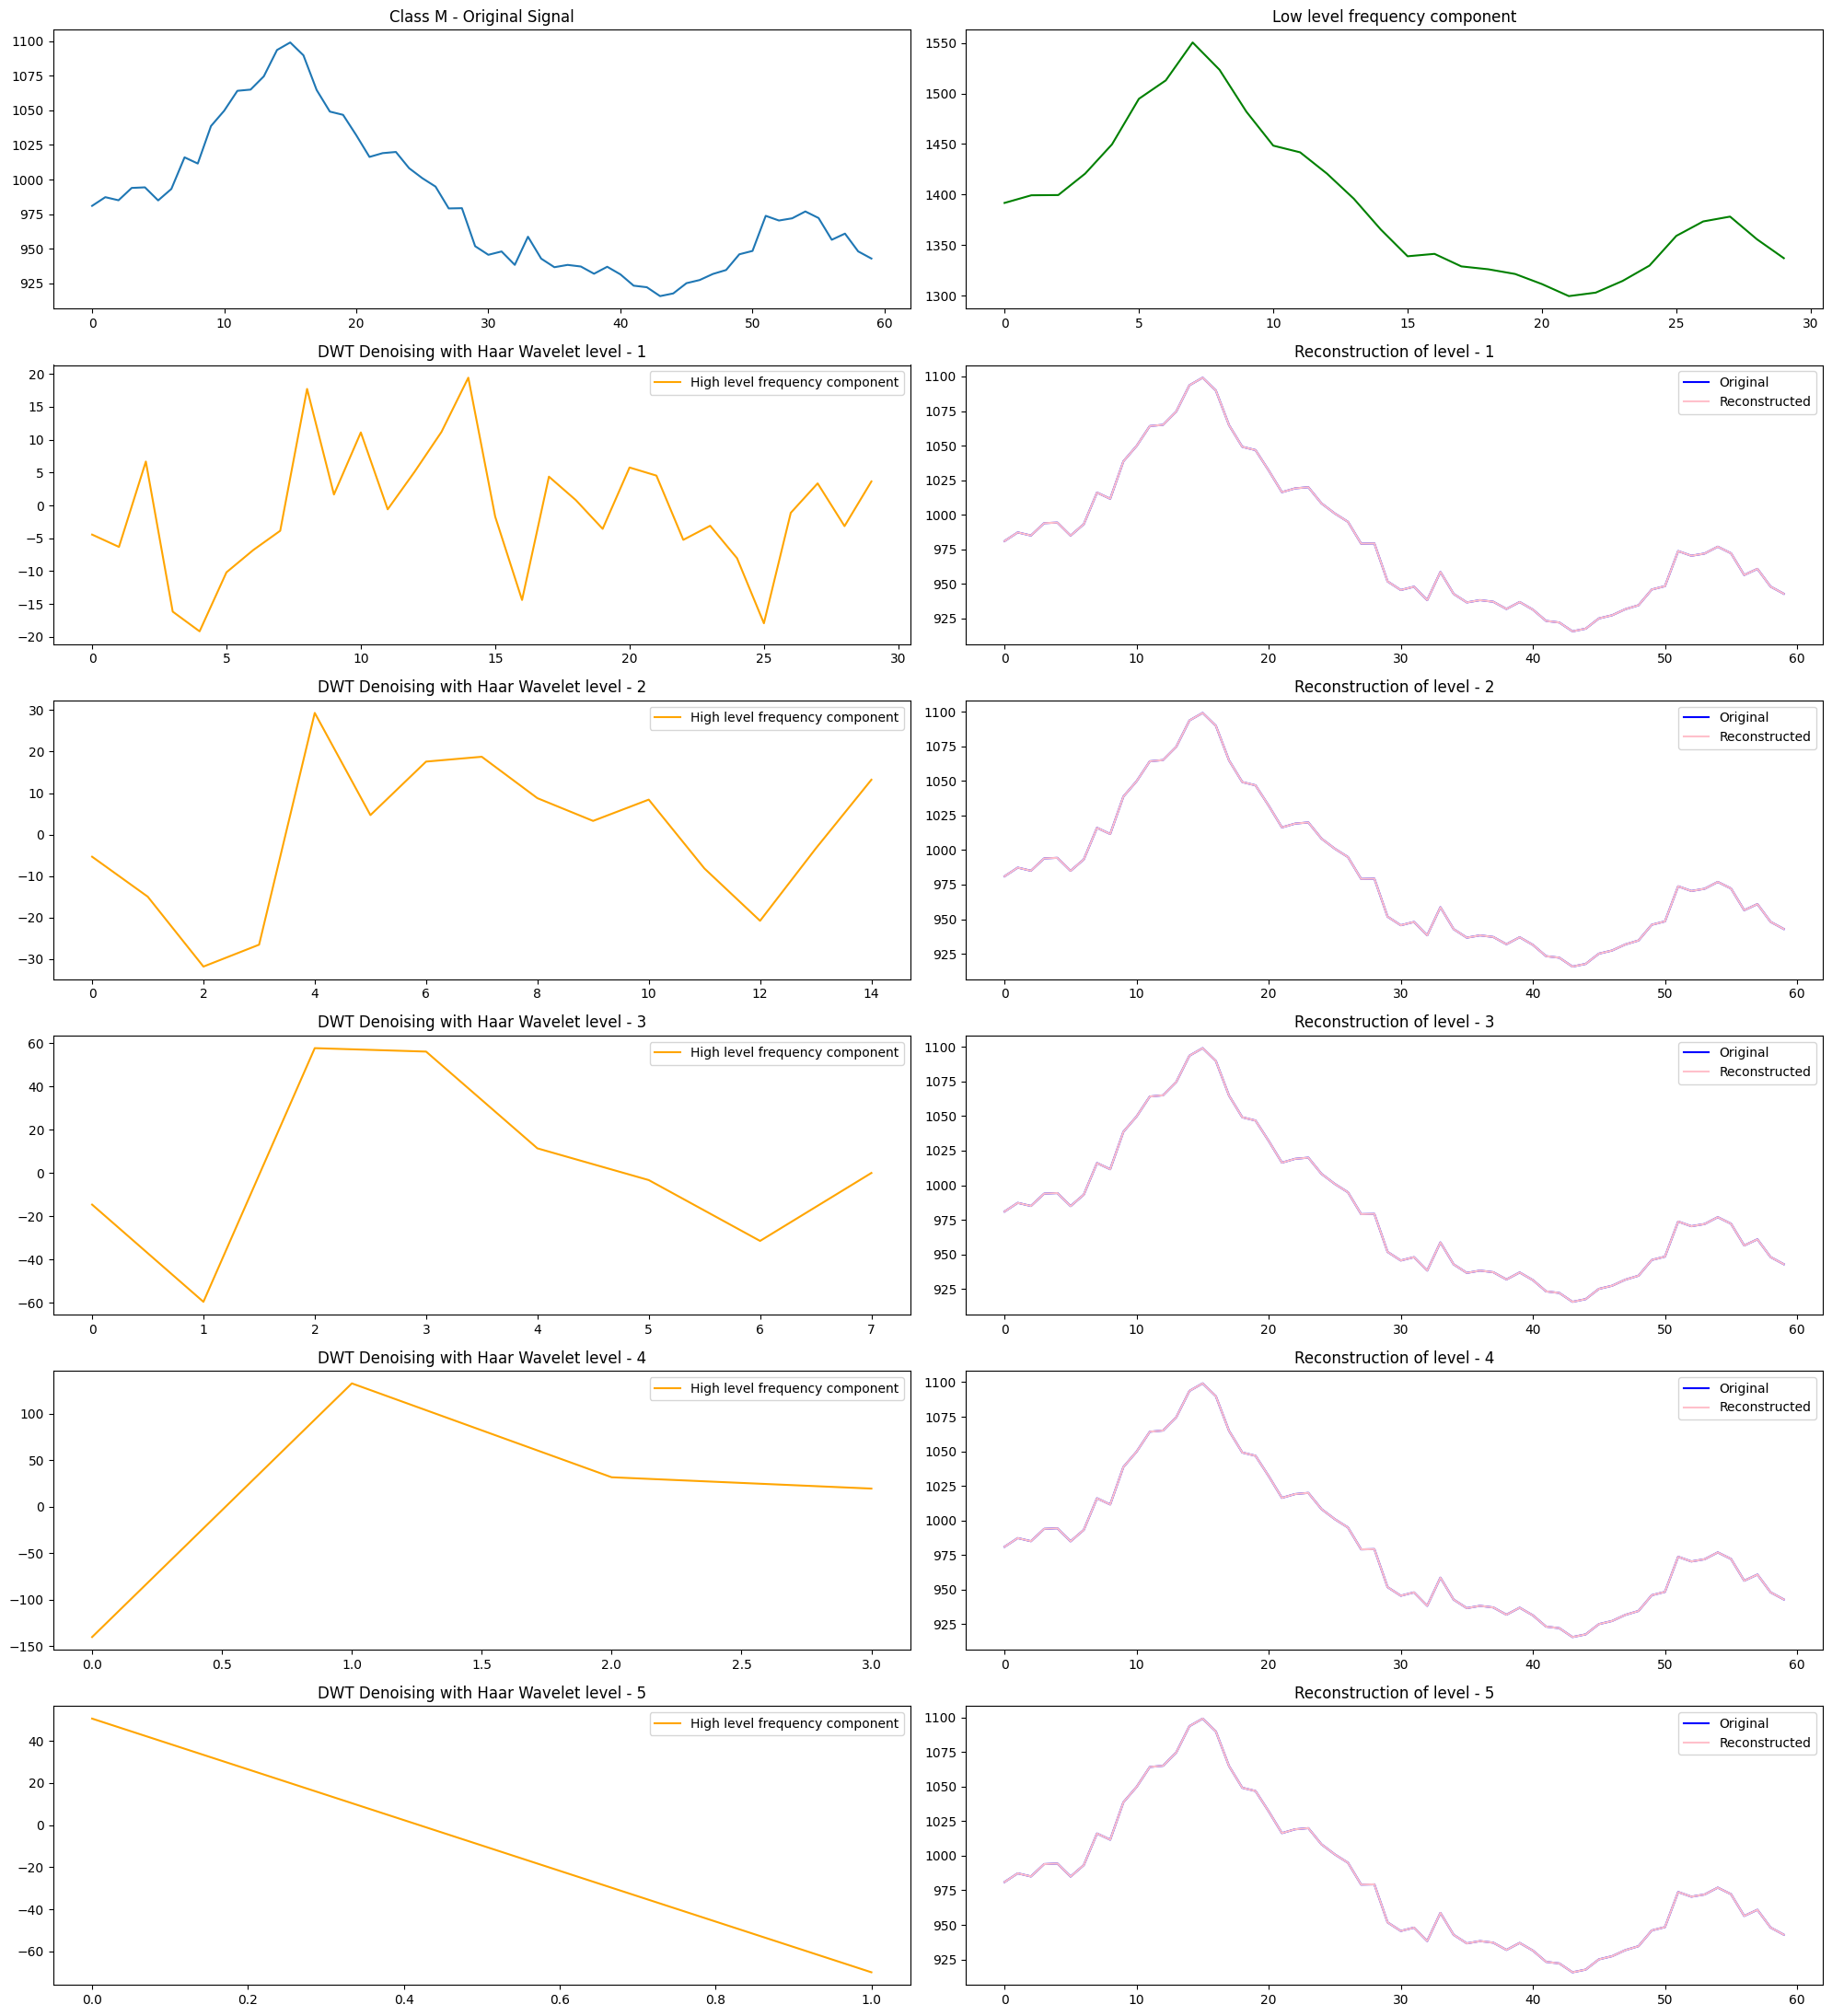

In [50]:
# Create subplots for visualizing wavelet denoising at different levels
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 22))
axes = axes.flatten()
count = 0

# Iterate through different wavelet denoising levels
for lvl in range(1, 6):
    wav = 'haar'
    
    # Apply wavelet denoising to the Class M signal
    filtered = wavelet_denoising(signal_M, wavelet=wav, level=lvl)
    recons_ = pywt.waverec(filtered, "haar")

    # Plot the original signal
    if lvl == 1:
        axes[0].plot(time_M, signal_M)
        axes[count].set_title("Class M - Original Signal")
        count += 1

        # Plot the low-level frequency component
        axes[count].plot(filtered[0], c="green")
        axes[count].set_title("Low level frequency component")
        count += 1

        # Plot the high-level frequency component
        axes[count].plot(filtered[-lvl], c="orange", label='High level frequency component')
        t = "DWT Denoising with Haar Wavelet level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

        # Plot the original and reconstructed signals
        axes[count].plot(time_M, signal_M, label="Original", c="blue")
        axes[count].plot(time_M, recons_, label='Reconstructed', c="pink")
        t = "Reconstruction of level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

    else:
        # Plot the high-level frequency component
        axes[count].plot(filtered[-lvl], c="orange", label='High level frequency component')
        t = "DWT Denoising with Haar Wavelet level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

        # Plot the original and reconstructed signals
        axes[count].plot(time_M, signal_M, label="Original", c="blue")
        axes[count].plot(time_M, recons_, label='Reconstructed', c="pink")
        t = "Reconstruction of level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

# Adjust layout for better visualization
fig.tight_layout()

### Visualizing the wavelet denoising process for the Class C signal at different levels using the Haar wavelet.

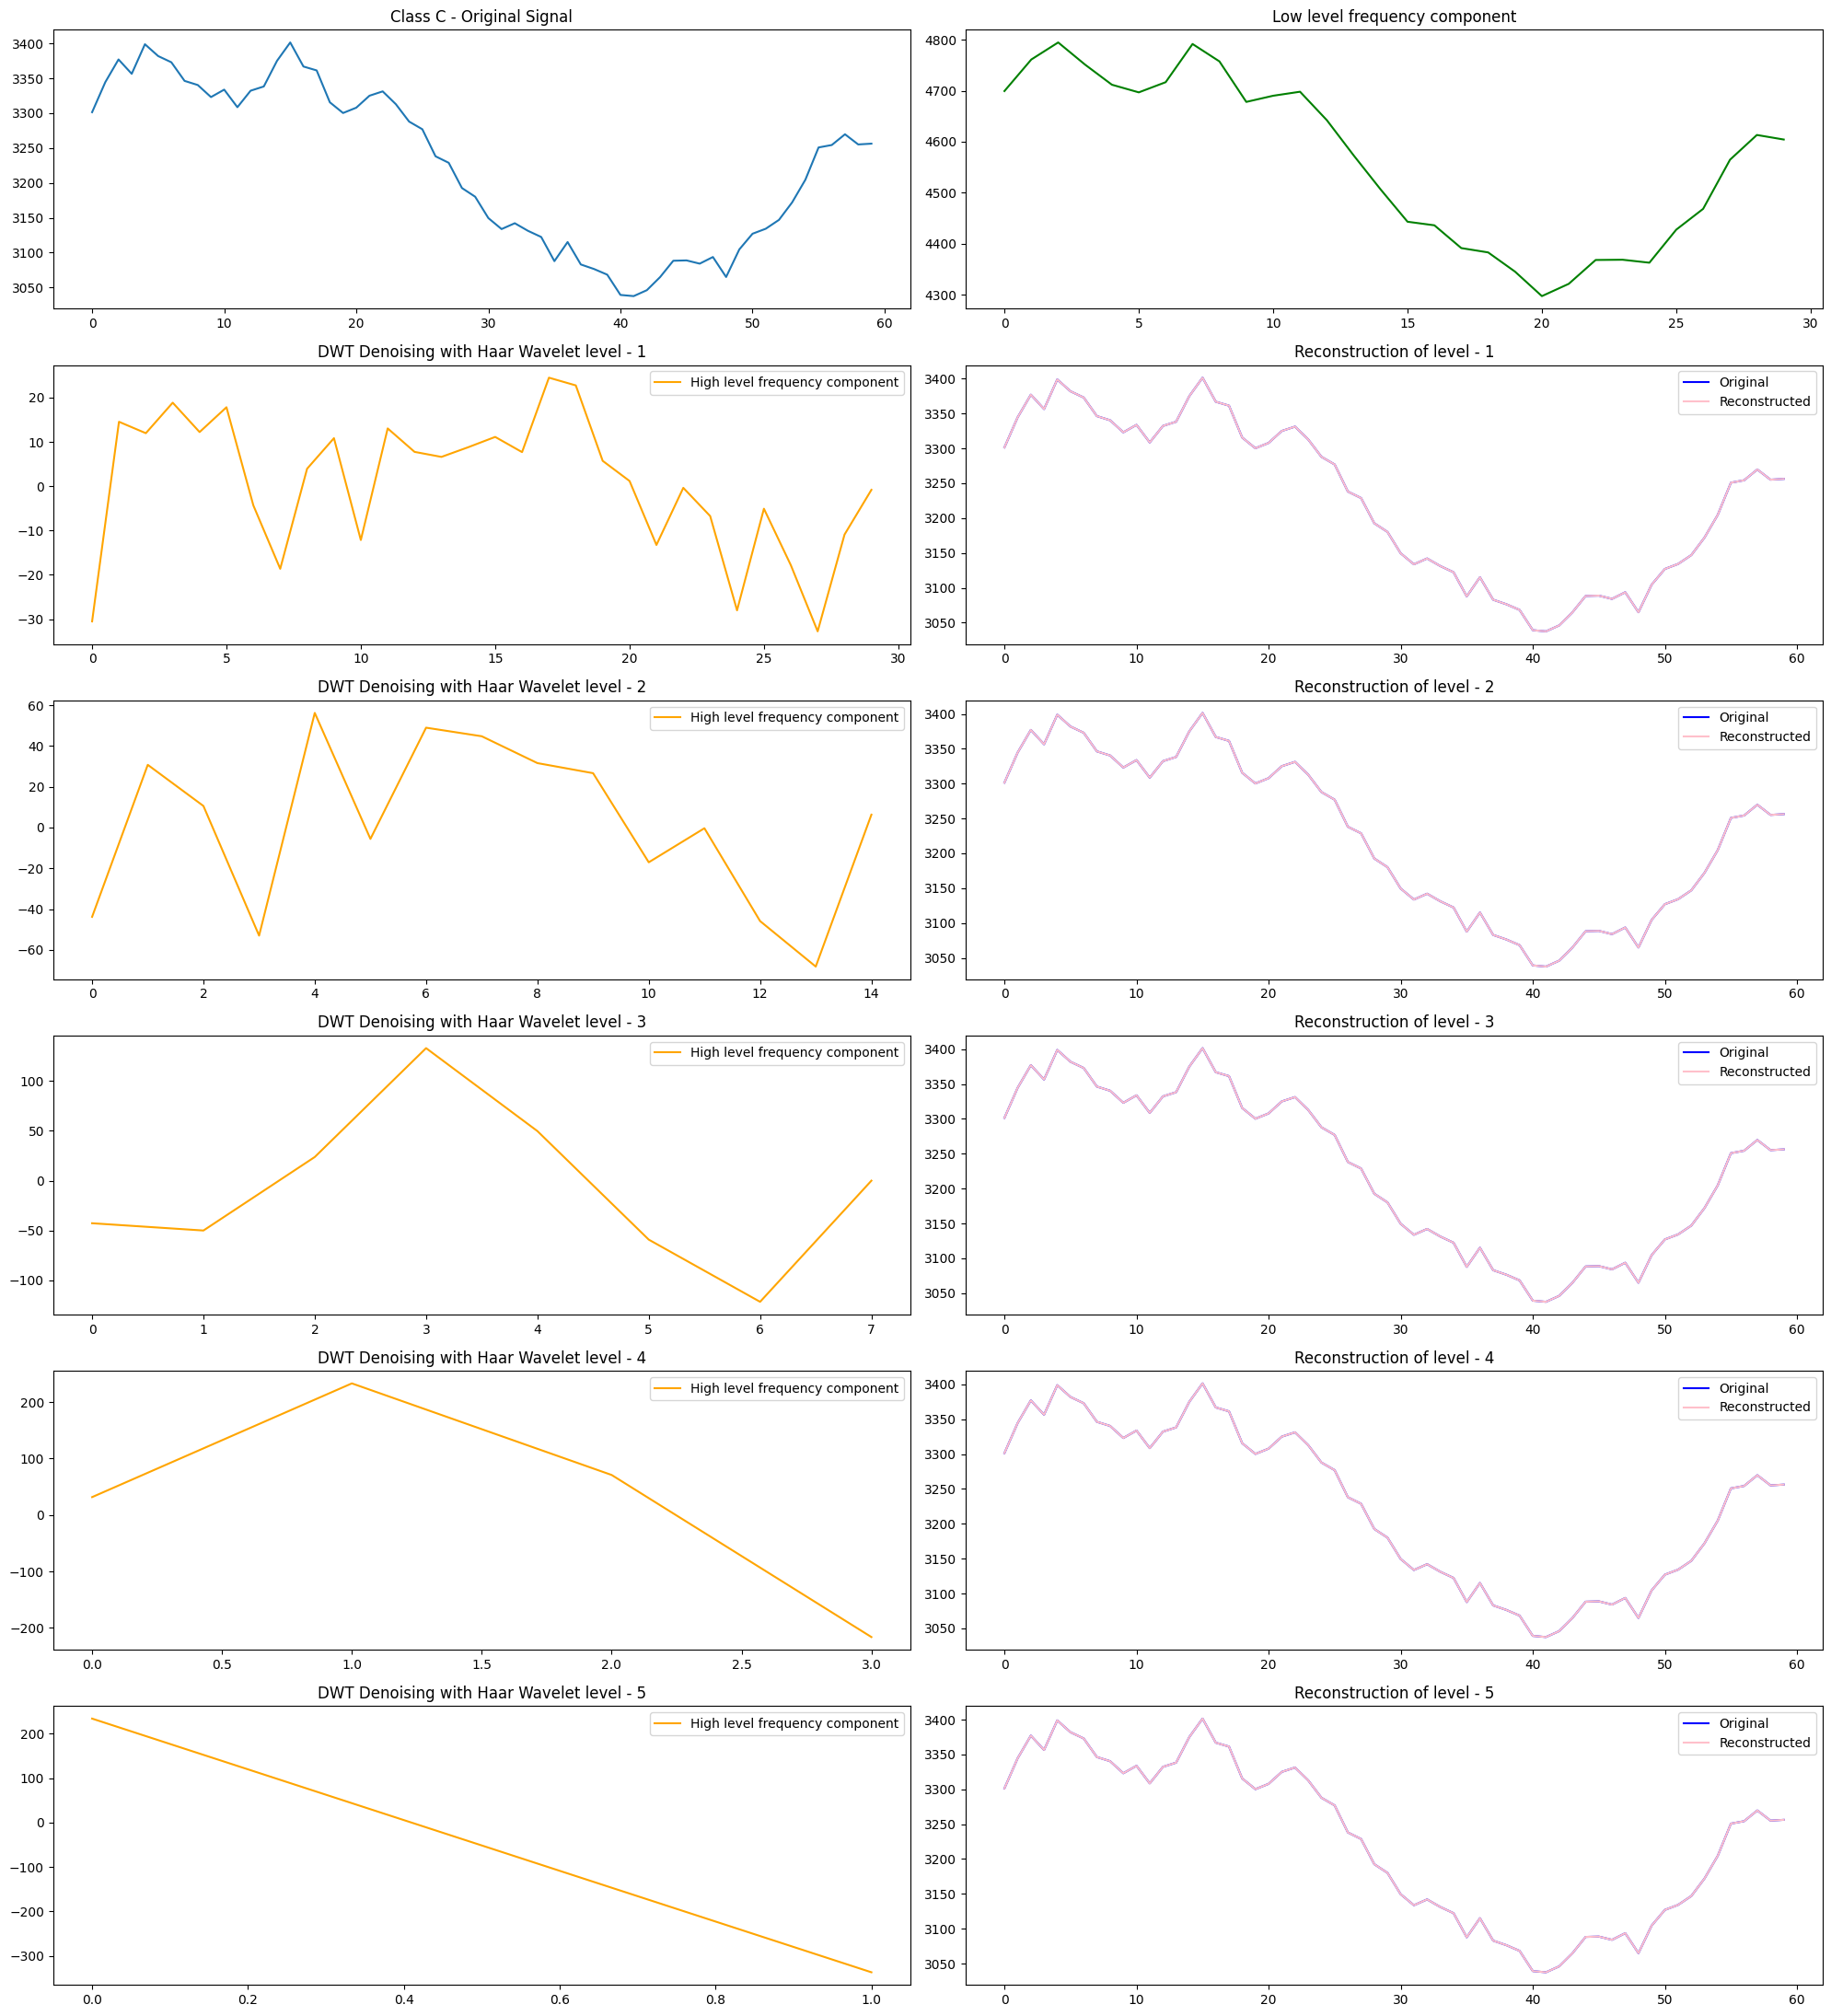

In [51]:
# Create subplots for visualizing wavelet denoising at different levels for Class C
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 22))
axes = axes.flatten()
count = 0

# Iterate through different wavelet denoising levels
for lvl in range(1, 6):
    wav = 'haar'

    # Apply wavelet denoising to the Class C signal
    filtered = wavelet_denoising(signal_C, wavelet=wav, level=lvl)
    recons_ = pywt.waverec(filtered, "haar")

    # Plot the original signal
    if lvl == 1:
        axes[count].plot(time_C, signal_C)
        axes[count].set_title("Class C - Original Signal")
        count += 1

        # Plot the low-level frequency component
        axes[count].plot(filtered[0], c="green")
        axes[count].set_title("Low level frequency component")
        count += 1

        # Plot the high-level frequency component
        axes[count].plot(filtered[-lvl], c="orange", label='High level frequency component')
        t = "DWT Denoising with Haar Wavelet level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

        # Plot the original and reconstructed signals
        axes[count].plot(time_C, signal_C, label="Original", c="blue")
        axes[count].plot(time_C, recons_, label='Reconstructed', c="pink")
        t = "Reconstruction of level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

    else:
        # Plot the high-level frequency component
        axes[count].plot(filtered[-lvl], c="orange", label='High level frequency component')
        t = "DWT Denoising with Haar Wavelet level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

        # Plot the original and reconstructed signals
        axes[count].plot(time_C, signal_C, label="Original", c="blue")
        axes[count].plot(time_C, recons_, label='Reconstructed', c="pink")
        t = "Reconstruction of level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

# Adjust layout for better visualization
fig.tight_layout()
